# Seam Carving

Seam carving is an image editing technique that makes it possible to change the size of images by adding or removing seams.This algorithm preserves important structures and details in the image while it is being adjusted.

In [1]:
import os
import numpy as np
import matplotlib.image as mpimage
import matplotlib.pyplot as plt

from mog import magnitude_of_gradients, show_image
from seam_carving import seam_carve, update_global_mask, calculate_accum_energy, create_seam_mask

# 1. Removing Seams

## Algorithm

1. Preprocessing
    - Load image.
    - Create a mask to save the removed seams.

In [2]:
NUMBER_OF_SEAMS_TO_REMOVE = 1
IMAGE_FILENAME = 'images/tower.jpg' # source: https://en.wikipedia.org/wiki/Seam_carving

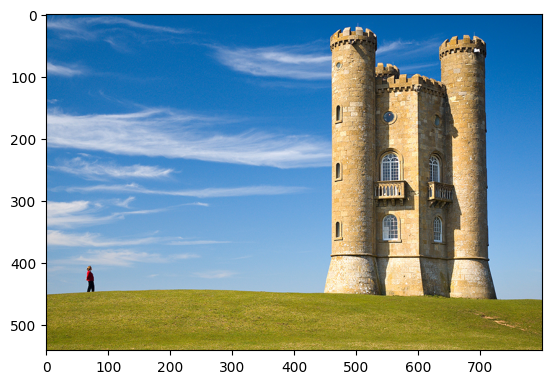

In [3]:
img: np.ndarray = mpimage.imread(IMAGE_FILENAME)
global_mask: np.ndarray = np.zeros((img.shape[0], img.shape[1]), dtype = bool)
img_carved: np.ndarray = np.array(img, copy = True)

show_image(img)

2. Seam-Carving-Algorithm (Removing Seams)
    - Implement the functions for energy calculation, accumulated energy and the creation of seamasks.
    - Reduce the size of the image by removing seams.

In [4]:
# for idx in range(NUMBER_OF_SEAMS_TO_REMOVE):

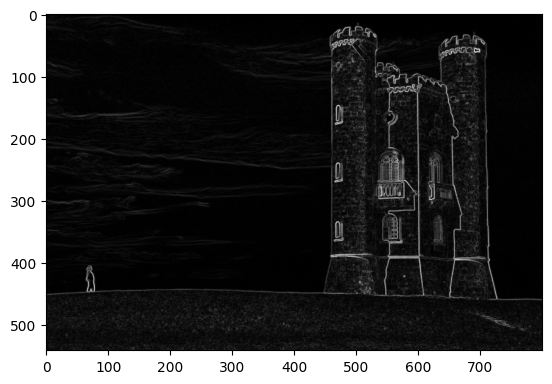

In [5]:

        img_energy = magnitude_of_gradients(img_carved)
        show_image(img_energy)

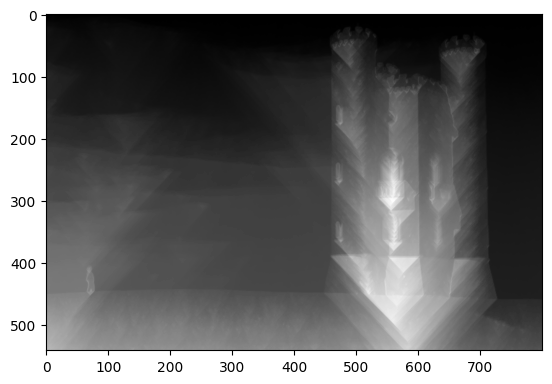

In [6]:
        img_accumulated = calculate_accum_energy(img_energy)
        show_image(img_accumulated)

In [7]:
    seam_mask = create_seam_mask(img_accumulated)
    print(f"Number of False in seam_mask: {np.count_nonzero(seam_mask == False)}")

Number of False in seam_mask: 542


In [8]:
    img_carved = seam_carve(img_carved, seam_mask)
    global_mask = update_global_mask(global_mask, seam_mask)

In [9]:
    img_path = np.copy(img)
    img_path[global_mask, :] = [255, 0, 0]

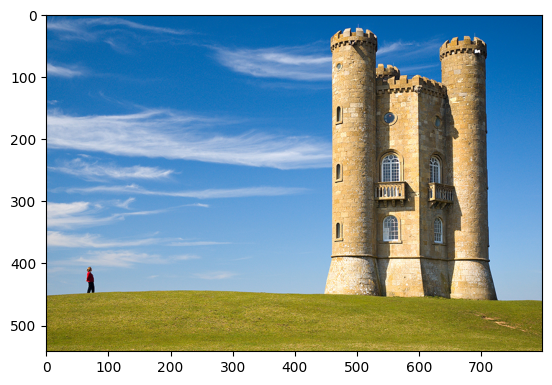

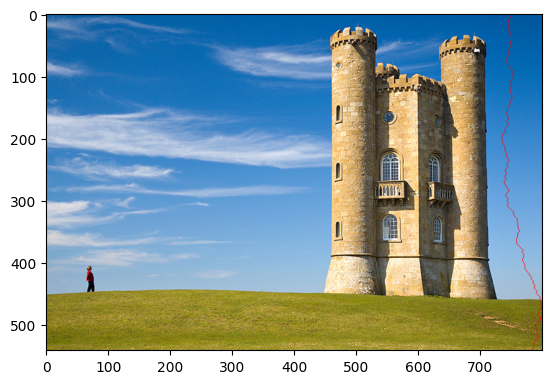

In [10]:
        show_image(img_carved)
        show_image(img_path)

## Examples
1. Horizontal

In [11]:
NUMBER_OF_SEAMS_TO_REMOVE = 40
IMAGE_FILENAME = 'images/pexels-elina-volkova-18945004.jpg'

In [12]:
# Initialization
img: np.ndarray = mpimage.imread(IMAGE_FILENAME)
img = np.rot90(img, k=-1) # rotation (pi/2 clockwise)
global_mask: np.ndarray = np.zeros((img.shape[0], img.shape[1]), dtype=bool)
img_new: np.ndarray = np.array(img, copy=True)

# Seam Carving Algorithm
for idx in range(NUMBER_OF_SEAMS_TO_REMOVE):
    img_energy = magnitude_of_gradients(img_new)
    img_accumulated = calculate_accum_energy(img_energy)
    seam_mask = create_seam_mask(img_accumulated)
    img_new = seam_carve(img_new, seam_mask)
    global_mask = update_global_mask(global_mask, seam_mask)
    img_copy = np.copy(img)
    img_copy[global_mask, :] = [255, 0, 0]

    if idx == NUMBER_OF_SEAMS_TO_REMOVE - 1:
        img_new = np.rot90(img_new, k=1) # rotation (pi/2 counterclockwise)
        img_copy = np.rot90(img_copy, k=1)
        img_cutted_filename = f"{IMAGE_FILENAME}_seam_carving_cutted_{idx:03d}.png"
        img_original_filename = f"{IMAGE_FILENAME}_seam_carving_{idx:03d}.png"
        mpimage.imsave(img_cutted_filename, img_new)
        mpimage.imsave(img_original_filename, img_copy)

        print("Iteration:", idx, "\timage carved:", img_new.shape)
        break
    
    print("Iteration:", idx, f"\timage carved: ({img_new.shape[1]}, {img_new.shape[0]}, {img_new.shape[2]})")

Iteration: 0 	image carved: (766, 511, 3)
Iteration: 1 	image carved: (765, 511, 3)
Iteration: 2 	image carved: (764, 511, 3)
Iteration: 3 	image carved: (763, 511, 3)
Iteration: 4 	image carved: (762, 511, 3)
Iteration: 5 	image carved: (761, 511, 3)
Iteration: 6 	image carved: (760, 511, 3)
Iteration: 7 	image carved: (759, 511, 3)
Iteration: 8 	image carved: (758, 511, 3)
Iteration: 9 	image carved: (757, 511, 3)
Iteration: 10 	image carved: (756, 511, 3)
Iteration: 11 	image carved: (755, 511, 3)
Iteration: 12 	image carved: (754, 511, 3)
Iteration: 13 	image carved: (753, 511, 3)
Iteration: 14 	image carved: (752, 511, 3)
Iteration: 15 	image carved: (751, 511, 3)
Iteration: 16 	image carved: (750, 511, 3)
Iteration: 17 	image carved: (749, 511, 3)
Iteration: 18 	image carved: (748, 511, 3)
Iteration: 19 	image carved: (747, 511, 3)
Iteration: 20 	image carved: (746, 511, 3)
Iteration: 21 	image carved: (745, 511, 3)
Iteration: 22 	image carved: (744, 511, 3)
Iteration: 23 	image 

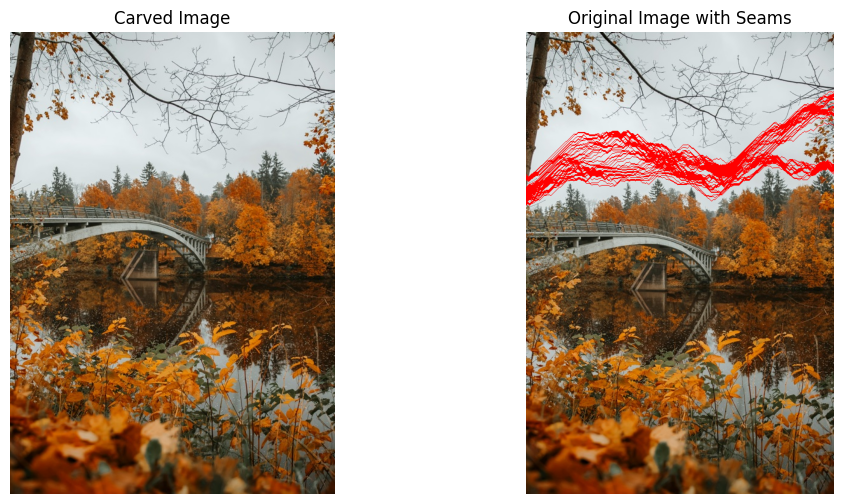

In [13]:
# Display images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_new)
axes[0].set_title('Carved Image')
axes[0].axis('off')

axes[1].imshow(img_copy)
axes[1].set_title('Original Image with Seams')
axes[1].axis('off')

plt.show()

2. Vertical

In [14]:
NUMBER_OF_SEAMS_TO_REMOVE = 30
IMAGE_FILENAME = 'images/pexels-elina-volkova-18945000.jpg'

In [15]:
# Initialization
img: np.ndarray = mpimage.imread(IMAGE_FILENAME)
global_mask: np.ndarray = np.zeros((img.shape[0], img.shape[1]), dtype=bool)
img_new: np.ndarray = np.array(img, copy=True)

# Seam Carving Algorithm
for idx in range(NUMBER_OF_SEAMS_TO_REMOVE):
    img_energy = magnitude_of_gradients(img_new)
    img_accumulated = calculate_accum_energy(img_energy)
    seam_mask = create_seam_mask(img_accumulated)
    img_new = seam_carve(img_new, seam_mask)
    global_mask = update_global_mask(global_mask, seam_mask)
    img_copy = np.copy(img)
    img_copy[global_mask, :] = [255, 0, 0]

    if idx == NUMBER_OF_SEAMS_TO_REMOVE - 1:
        img_cutted_filename = f"{IMAGE_FILENAME}_seam_carving_cutted_{idx:03d}.png"
        img_original_filename = f"{IMAGE_FILENAME}_seam_carving_{idx:03d}.png"
        mpimage.imsave(img_cutted_filename, img_new)
        mpimage.imsave(img_original_filename, img_copy)

    print("Iteration:", idx, "\timage carved:", img_new.shape)

Iteration: 0 	image carved: (780, 519, 3)
Iteration: 1 	image carved: (780, 518, 3)
Iteration: 2 	image carved: (780, 517, 3)
Iteration: 3 	image carved: (780, 516, 3)
Iteration: 4 	image carved: (780, 515, 3)
Iteration: 5 	image carved: (780, 514, 3)
Iteration: 6 	image carved: (780, 513, 3)
Iteration: 7 	image carved: (780, 512, 3)
Iteration: 8 	image carved: (780, 511, 3)
Iteration: 9 	image carved: (780, 510, 3)
Iteration: 10 	image carved: (780, 509, 3)
Iteration: 11 	image carved: (780, 508, 3)
Iteration: 12 	image carved: (780, 507, 3)
Iteration: 13 	image carved: (780, 506, 3)
Iteration: 14 	image carved: (780, 505, 3)
Iteration: 15 	image carved: (780, 504, 3)
Iteration: 16 	image carved: (780, 503, 3)
Iteration: 17 	image carved: (780, 502, 3)
Iteration: 18 	image carved: (780, 501, 3)
Iteration: 19 	image carved: (780, 500, 3)
Iteration: 20 	image carved: (780, 499, 3)
Iteration: 21 	image carved: (780, 498, 3)
Iteration: 22 	image carved: (780, 497, 3)
Iteration: 23 	image 

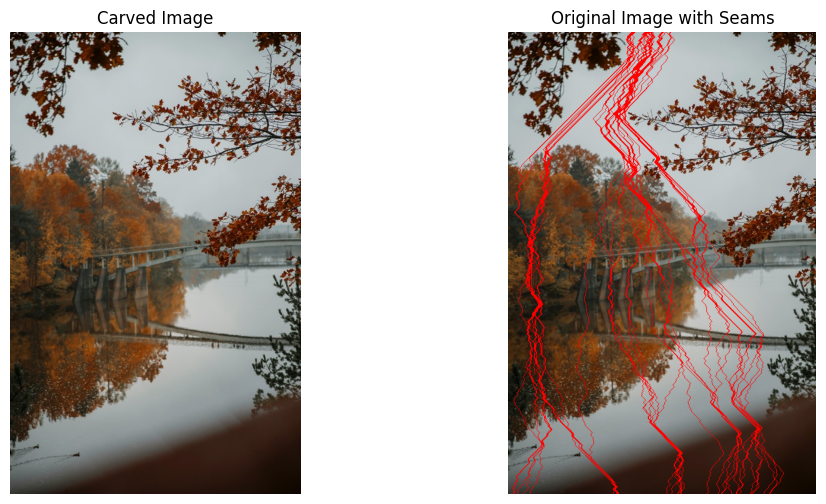

In [16]:
# Display images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_new)
axes[0].set_title('Carved Image')
axes[0].axis('off')

axes[1].imshow(img_copy)
axes[1].set_title('Original Image with Seams')
axes[1].axis('off')

plt.show()